In [1]:
cd/content/drive/My Drive/투빅스 13기

/content/drive/My Drive/투빅스 13기


In [0]:
!pip install -q tensorflow-gpu==2.0.0-rc1

In [0]:
import pandas as pd
import numpy as np

In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# 간단한 EDA, train data values만 가져옴
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
# test data
test = test.iloc[:,1:].values

In [0]:
# normalize inputs from 0~255 to 0~1
# 픽셀값이 255이기 때문에 범위를 0~1로 조정하기 위해서는 나눠야함.
X = X / 255
test = test / 255 

In [0]:
# 모듈 불러오기 및 data split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1004)

In [10]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


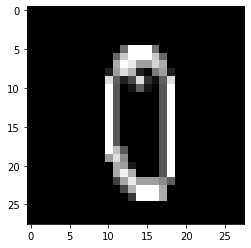

In [11]:
import matplotlib.pyplot as plt
idx = 1000
plt.imshow(X_train[idx].reshape(28,28),cmap="gray") # X_train data의 idx번째 값 이미지보기

In [0]:
def mish(x) :
    return x * tf.nn.tanh( tf.nn.softplus(x)) 

https://data-newbie.tistory.com/297  
 tf.keras.layers.Dense(256,activation=mish(input)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),

In [13]:
# tensorflow
import tensorflow as tf
from keras.layers.convolutional import Conv2D, MaxPooling2D #CNN
# model 수정
num_calsses = 10

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64,input_shape=(784,)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="relu",bias_initializer=tf.keras.initializers.he_normal(seed=None)),
  tf.keras.layers.BatchNormalization(),     
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="elu"), 
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512,activation="elu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(256,activation="elu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128,activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64,activation="selu"),
  tf.keras.layers.Dense(num_calsses,activation="softmax") 
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


tf.keras.layers.LeakyReLU(alpha=0.3) 성능이 안좋음

 # Model
 - batch_size가 1이 아닌 것 알기 때문에,그대로 BatchNormalization  
 - weight들끼리의 동조화 현상은 layer를 지날수록 심해질 것으로 예상, Dropout 0.1 ~ 0.4 까지줌 그대로 사용  
 - activation : selu - selu - selu 로 사용, 다중클래스 예측이므로 softmax 사용  
 - relu 이므로 bias_initialization을 he_normal로 해줌  
 - adam,RAdama,adammax,Nadam사용해봄
 - layer 순서 : Dense(input) - BatchNormalization - Dropout - 다시 Dense(activation) ... - 

In [14]:
!pip install keras-rectified-adam

In [0]:
model.compile(opimizer="adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
from keras_radam.training import RAdamOptimizer # 이번에는 Radam
model.compile(optimizer=RAdamOptimizer(),loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [16]:
%time history = model.fit(X_train,y_train,batch_size=256,epochs=80,validation_data=[X_test,y_test])

Train on 33600 samples, validate on 8400 samples
Epoch 1/80
33600/33600 [==============================] - 5s 149us/sample - loss: 1.4094 - acc: 0.5587 - val_loss: 0.3901 - val_acc: 0.8777
Epoch 2/80
33600/33600 [==============================] - 3s 99us/sample - loss: 0.3746 - acc: 0.8792 - val_loss: 0.1940 - val_acc: 0.9400
Epoch 3/80
33600/33600 [==============================] - 3s 98us/sample - loss: 0.2448 - acc: 0.9226 - val_loss: 0.1535 - val_acc: 0.9542
Epoch 4/80
33600/33600 [==============================] - 3s 98us/sample - loss: 0.1910 - acc: 0.9402 - val_loss: 0.1255 - val_acc: 0.9615
Epoch 5/80
33600/33600 [==============================] - 3s 99us/sample - loss: 0.1645 - acc: 0.9487 - val_loss: 0.1147 - val_acc: 0.9662
Epoch 6/80
33600/33600 [==============================] - 3s 99us/sample - loss: 0.1455 - acc: 0.9536 - val_loss: 0.1054 - val_acc: 0.9695
Epoch 7/80
33600/33600 [==============================] - 3s 101us/sample - loss: 0.1327 - acc: 0.9584 - val_loss: 0

In [17]:
# 모델 평가
score = model.evaluate(X_test, y_test, verbose=1)
print("\nTest cost:", score[0])
print('Test accuracy:', score[1])

8400/8400 [==============================] - 1s 116us/sample - loss: 0.0609 - acc: 0.9855

Test cost: 0.060852637860086926
Test accuracy: 0.9854762


In [0]:
# pip install keras-rectified-adam # optimize

In [0]:
predictions = model.predict_classes(test)

In [19]:
sample_submission["Category"]=pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("final_submission.csv",index=False)

KeyError: ignored

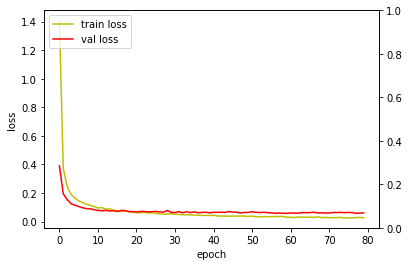

In [21]:
# visualization
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

epoch를 20으로 하나 50으로 하나 별다를바 없음을 알 수 있음

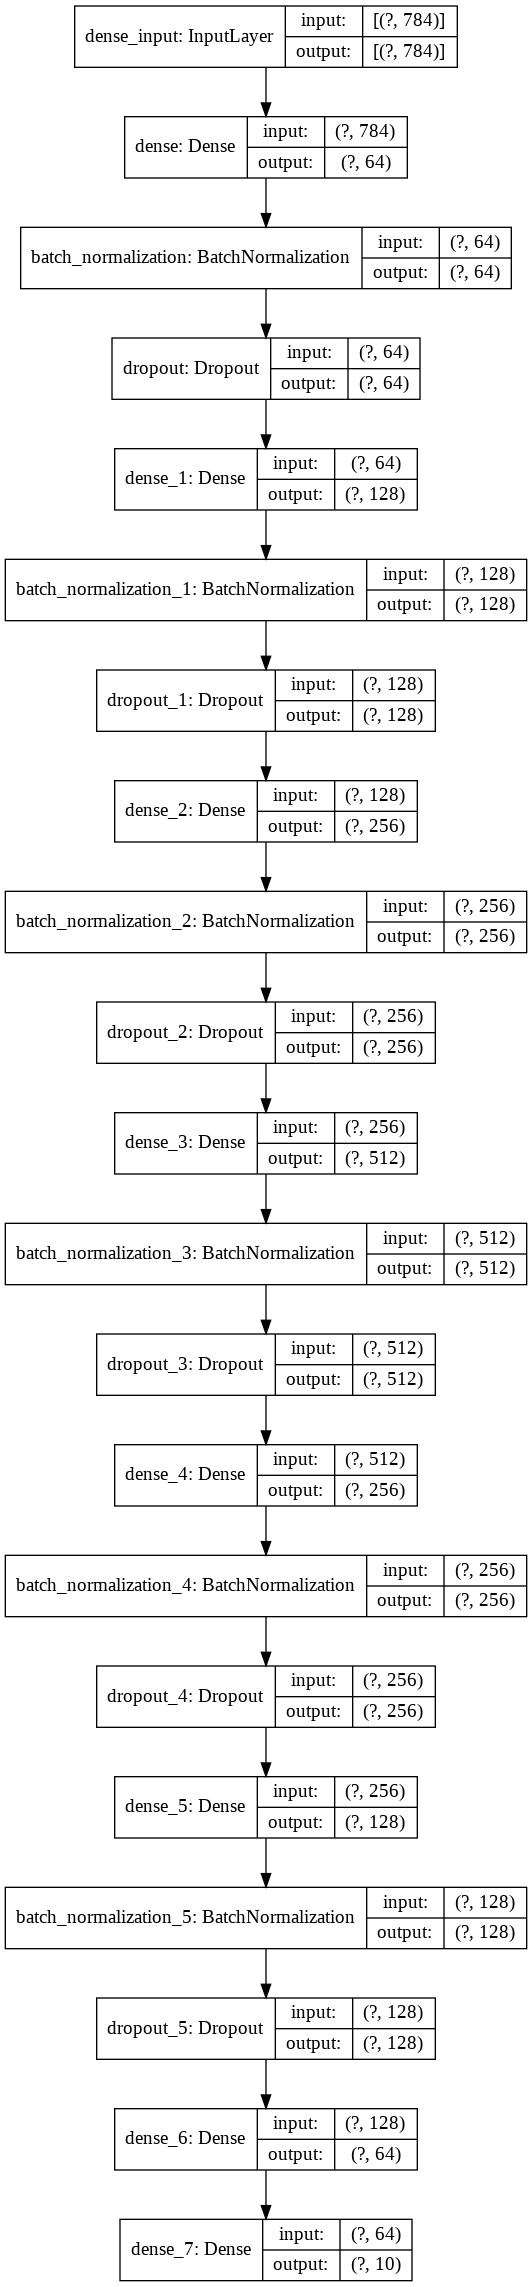

In [22]:
# model layer 시각화
tf.keras.utils.plot_model(model, '*.png', show_shapes = True)

https://www.tensorflow.org/guide/keras/overview?hl=ko